In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('precision',4)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar Bases

In [3]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [4]:
base_cancel = pd.read_csv(path_base('db_CartaoCredito_cancelamento.csv'))
base_st = pd.read_csv(path_base('db_CartaoCredito_semtarget.csv'))

C:\MyGit\py_cancelcartao\notebook
C:\MyGit\py_cancelcartao\data
C:\MyGit\py_cancelcartao\data\db_CartaoCredito_cancelamento.csv
C:\MyGit\py_cancelcartao\notebook
C:\MyGit\py_cancelcartao\data
C:\MyGit\py_cancelcartao\data\db_CartaoCredito_semtarget.csv


In [5]:
base_cancel.head(3)

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade
0,180,2,mulher,24,2,1875,133.929,156.250,MA,Centro Novo do Maranhão,Região Nordeste,13.021,2,"251,1938708281"
1,119,3,mulher,22,0,725,51.786,60.417,PI,Amarante,Região Nordeste,5.492,13,"233,5439410115"
2,274,3,homem,22,0,72292,5163.714,6024.333,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.667,2,"275,4369442974"


In [32]:
base_st.head(3)

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade
0,1,3,homem,22,1,7250.000,517.857,604.167,MG,Morada Nova de Minas,Região Sudeste,54.924,5,"62,9304011407"
1,2,1,mulher,38,1,71283.000,5091.643,5940.250,RN,Marcelino Vieira,Região Nordeste,312.645,7,"37,9153459043"
2,3,3,mulher,26,0,7925.000,566.071,660.417,PR,Agudos do Sul,Região Sul,50.801,6,"60,9993188527"


# Gerar apenas uma base única com as duas
### Tirar coluna Id e acrescentar coluna target

In [33]:
# Colocar variavel target nas base
base_cancel['Target'] =  pd.Series(1, index=base_cancel.index)
base_st['Target'] =  pd.Series(0, index=base_st.index)

In [34]:
print(base_cancel.shape)
base_cancel.head(3)

(300, 15)


,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,180,2,mulher,24,2,1875,133.929,156.250,MA,Centro Novo do Maranhão,Região Nordeste,13.021,2,"251,1938708281",1
1,119,3,mulher,22,0,725,51.786,60.417,PI,Amarante,Região Nordeste,5.492,13,"233,5439410115",1
2,274,3,homem,22,0,72292,5163.714,6024.333,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.667,2,"275,4369442974",1


In [35]:
print(base_st.shape)
base_st.head(3)

(891, 15)


,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,1,3,homem,22,1,7250.000,517.857,604.167,MG,Morada Nova de Minas,Região Sudeste,54.924,5,"62,9304011407",0
1,2,1,mulher,38,1,71283.000,5091.643,5940.250,RN,Marcelino Vieira,Região Nordeste,312.645,7,"37,9153459043",0
2,3,3,mulher,26,0,7925.000,566.071,660.417,PR,Agudos do Sul,Região Sul,50.801,6,"60,9993188527",0


In [36]:
# Empilhar bases
dados = pd.concat([base_cancel, base_st], axis=0)
print(dados.shape)

(1191, 15)


In [37]:
# Selecionar colunas
base_columns = ['PerfilEconomico', 'Sexo', 'Idade', 'PerfilCompra',
       'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia',
       'RegiaodoPais', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade',
       'Target']

In [38]:
dados = dados[base_columns]


In [39]:
dados.head(3)

,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,2,mulher,24,2,1875.000,133.929,156.250,MA,Centro Novo do Maranhão,Região Nordeste,13.021,2,"251,1938708281",1
1,3,mulher,22,0,725.000,51.786,60.417,PI,Amarante,Região Nordeste,5.492,13,"233,5439410115",1
2,3,homem,22,0,72292.000,5163.714,6024.333,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.667,2,"275,4369442974",1


In [40]:
dados.dtypes

PerfilEconomico          int64
Sexo                    object
Idade                    int64
PerfilCompra             int64
ValorCompraAnual       float64
GastoMax               float64
GastoMedio             float64
UF                      object
CidadeResidencia        object
RegiaodoPais            object
NumeroComprasOnline    float64
MesesDesempregado        int64
Anuidade                object
Target                   int64
dtype: object

In [41]:
# Converter anuidade para float
dados.Anuidade = dados.Anuidade.str.replace(',', '.').astype(float)

In [42]:
dados.nunique()

PerfilEconomico           3
Sexo                      2
Idade                    65
PerfilCompra              7
ValorCompraAnual        260
GastoMax                261
GastoMedio              261
UF                       26
CidadeResidencia        851
RegiaodoPais              5
NumeroComprasOnline     704
MesesDesempregado        15
Anuidade               1191
Target                    2
dtype: int64

# Analise exploratória de variáveis

# Verificar se tem nulas

In [43]:
dados.isnull().sum()

PerfilEconomico         0
Sexo                    0
Idade                   0
PerfilCompra            0
ValorCompraAnual       28
GastoMax                0
GastoMedio              0
UF                      0
CidadeResidencia        0
RegiaodoPais            0
NumeroComprasOnline     0
MesesDesempregado       0
Anuidade                0
Target                  0
dtype: int64

In [44]:
# Substituir Null com médias
dados.ValorCompraAnual = dados.ValorCompraAnual.fillna(dados.ValorCompraAnual.mean())
dados.isnull().sum()

PerfilEconomico        0
Sexo                   0
Idade                  0
PerfilCompra           0
ValorCompraAnual       0
GastoMax               0
GastoMedio             0
UF                     0
CidadeResidencia       0
RegiaodoPais           0
NumeroComprasOnline    0
MesesDesempregado      0
Anuidade               0
Target                 0
dtype: int64

### Numéricas

In [45]:
# Exploratoria numericas

In [46]:
base_numericas = ['Idade', 'ValorCompraAnual','GastoMax', 'GastoMedio', 
                  'NumeroComprasOnline', 'MesesDesempregado','Anuidade']

In [47]:
dados[base_numericas].describe()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline,MesesDesempregado,Anuidade
count,1191.000,1191.000,1191.000,1191.000,1191.000,1191.000,1191.000
mean,30.274,108034.128,7834.605,9140.372,66806.383,5.095,83.569
std,12.360,362453.581,26481.770,30895.399,1404381.475,3.485,69.069
min,10.000,0.000,0.000,0.000,0.000,0.000,0.006
25%,22.000,195.000,11.714,13.667,1.160,2.000,33.551
50%,26.000,2655.000,187.500,218.750,13.214,5.000,69.101
75%,36.000,78958.000,5610.143,6545.167,559.974,8.000,107.133
max,92.000,5123292.000,365949.429,426941.000,34107625.000,14.000,309.377


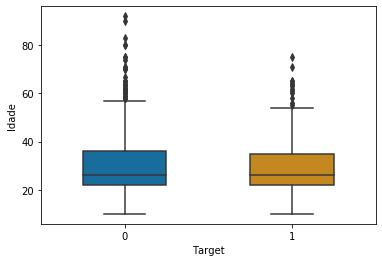

In [48]:
bplot = sns.boxplot(y='Idade', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind")
#bplot.figure.savefig(plot_file_name,
#                    format='jpeg',
#                    dpi=100)

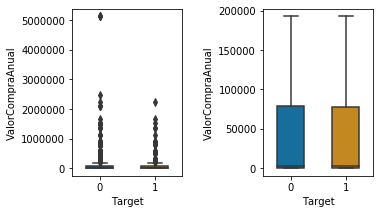

In [49]:
# Mostrar com e sem outliers
# Como existem valores muito discrepantes irei remover ValorCompraAnual > 200000
fig, ax =plt.subplots(1,2)
fig.tight_layout(pad=5.0)
sns.boxplot(y='ValorCompraAnual', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 ax=ax[0])
sns.boxplot(y='ValorCompraAnual', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 showfliers = False,
                 ax=ax[1])
fig.show()

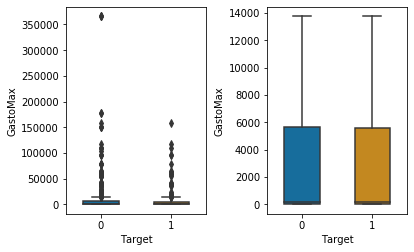

In [50]:
# Mostrar com e sem outliers
# Como existem valores muito discrepantes irei remover GastoMax > 14000 
fig, ax =plt.subplots(1,2)
fig.tight_layout(pad=3.0)
sns.boxplot(y='GastoMax', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 ax=ax[0])
sns.boxplot(y='GastoMax', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 showfliers = False,
                 ax=ax[1])
fig.show()

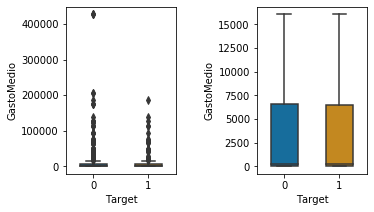

In [51]:
# Mostrar com e sem outliers
# Como existem valores muito discrepantes irei remover GastoMedio > 20000
fig, ax =plt.subplots(1,2)
fig.tight_layout(pad=5.0)
sns.boxplot(y='GastoMedio', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 ax=ax[0])
sns.boxplot(y='GastoMedio', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 showfliers = False,
                 ax=ax[1])
fig.show()

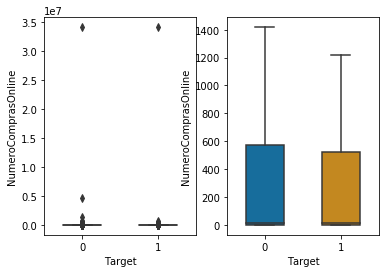

In [52]:
# Mostrar com e sem outliers
# Como existem valores muito discrepantes irei remover NumeroComprasOnline > 1400
fig, ax =plt.subplots(1,2)
sns.boxplot(y='NumeroComprasOnline', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 ax=ax[0])
sns.boxplot(y='NumeroComprasOnline', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind",
                 showfliers = False,
                 ax=ax[1])
fig.show()


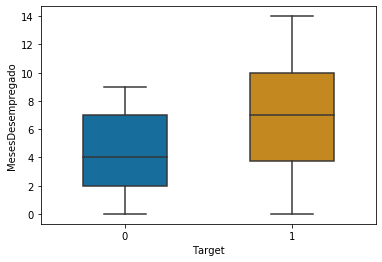

In [53]:
bplot = sns.boxplot(y='MesesDesempregado', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind")

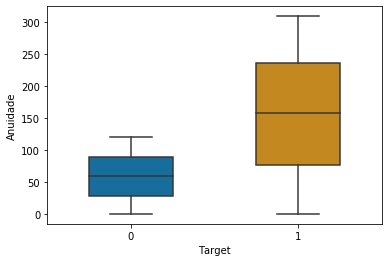

In [54]:
bplot = sns.boxplot(y='Anuidade', x='Target', 
                 data=dados, 
                 width=0.5,
                 palette="colorblind")

# Remover registros com outliers

In [55]:
dados[base_numericas].describe()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline,MesesDesempregado,Anuidade
count,1191.000,1191.000,1191.000,1191.000,1191.000,1191.000,1191.000
mean,30.274,108034.128,7834.605,9140.372,66806.383,5.095,83.569
std,12.360,362453.581,26481.770,30895.399,1404381.475,3.485,69.069
min,10.000,0.000,0.000,0.000,0.000,0.000,0.006
25%,22.000,195.000,11.714,13.667,1.160,2.000,33.551
50%,26.000,2655.000,187.500,218.750,13.214,5.000,69.101
75%,36.000,78958.000,5610.143,6545.167,559.974,8.000,107.133
max,92.000,5123292.000,365949.429,426941.000,34107625.000,14.000,309.377


In [56]:
# Como existem valores muito discrepantes irei remover GastoMedio > 20000
# Como existem valores muito discrepantes irei remover ValorCompraAnual > 200000
# Como existem valores muito discrepantes irei remover GastoMax > 14000 
# Como existem valores muito discrepantes irei remover NumeroComprasOnline > 1400

In [57]:
print(dados.shape)
print(dados[dados.GastoMedio < 20000].shape)
print(dados[dados.GastoMax < 14000 ].shape)
print(dados[dados.ValorCompraAnual < 200000].shape)
print(dados[dados.NumeroComprasOnline < 1400].shape)

(1191, 14)
(1071, 14)
(1055, 14)
(1063, 14)
(1045, 14)


In [58]:
dados = dados[(dados.GastoMedio < 20000) & 
              (dados.GastoMax < 14000) & 
              (dados.ValorCompraAnual < 200000) & 
              (dados.NumeroComprasOnline < 1400)]
print(dados.shape)

(1024, 14)


In [59]:
dados[base_numericas].describe()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline,MesesDesempregado,Anuidade
count,1024.000,1024.000,1024.000,1024.000,1024.000,1024.000,1024.000
mean,30.271,24785.688,1611.283,1879.830,158.851,5.133,83.738
std,12.243,40338.974,2757.797,3217.430,280.891,3.485,68.936
min,10.000,0.000,0.000,0.000,0.000,0.000,0.006
25%,22.000,145.000,9.643,11.250,0.792,2.000,34.243
50%,27.000,805.000,57.500,67.083,6.148,5.000,69.119
75%,35.000,40488.500,1608.929,1877.083,167.211,8.000,106.113
max,92.000,192583.000,13755.929,16048.583,1375.000,14.000,309.377


## Categóricas

In [60]:
# Como 'UF' e 'CidadeResidencia' possuem alta cardinalidade
# iremos utilizar apenas 'RegiaodoPais'

In [61]:
base_categoricas = ['PerfilEconomico', 'Sexo', 'PerfilCompra','RegiaodoPais']

------------------------------------------------
Cancelados:  3    445
2    177
1    140
Name: PerfilEconomico, dtype: int64
Não Cancelados:  3    143
2     61
1     58
Name: PerfilEconomico, dtype: int64
------------------------------------------------
Proporção cancelados:  3   58.399
2   23.228
1   18.373
Name: PerfilEconomico, dtype: float64
------------------------------------------------
Proporção não cancelados:  3   54.580
2   23.282
1   22.137
Name: PerfilEconomico, dtype: float64
------------------------------------------------


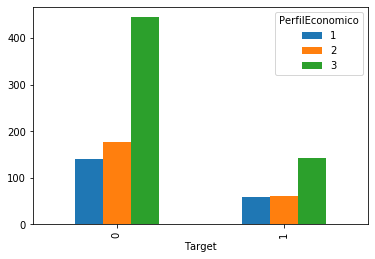

In [62]:
# PerfilEconomico
print('------------------------------------------------')
print( 'Cancelados: ',(dados[dados['Target'] == 0]['PerfilEconomico'].value_counts()))
print( 'Não Cancelados: ',(dados[dados['Target'] == 1]['PerfilEconomico'].value_counts()))
print('------------------------------------------------')
print( 'Proporção cancelados: ',
      (dados[dados['Target'] == 0]['PerfilEconomico'].value_counts()
       /dados[dados['Target'] == 0]['PerfilEconomico'].count())*100
     )
print('------------------------------------------------')
print('Proporção não cancelados: ',
      (dados[dados['Target'] == 1]['PerfilEconomico'].value_counts()
       /dados[dados['Target'] == 1]['PerfilEconomico'].count())*100
     )
print('------------------------------------------------')
dados.groupby(['Target','PerfilEconomico']).size().unstack().plot(kind='bar',stacked=False)

------------------------------------------------
Cancelados:  homem     511
mulher    251
Name: Sexo, dtype: int64
Não Cancelados:  homem     161
mulher    101
Name: Sexo, dtype: int64
------------------------------------------------
Proporção cancelados:  homem    67.060
mulher   32.940
Name: Sexo, dtype: float64
------------------------------------------------
Proporção não cancelados:  homem    61.450
mulher   38.550
Name: Sexo, dtype: float64
------------------------------------------------


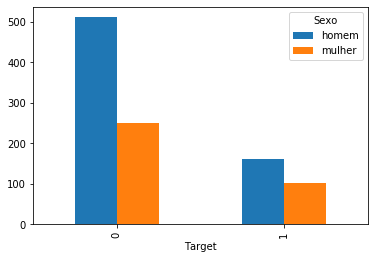

In [63]:
# Sexo
print('------------------------------------------------')
print( 'Cancelados: ',(dados[dados['Target'] == 0]['Sexo'].value_counts()))
print( 'Não Cancelados: ',(dados[dados['Target'] == 1]['Sexo'].value_counts()))
print('------------------------------------------------')
print( 'Proporção cancelados: ',
      (dados[dados['Target'] == 0]['Sexo'].value_counts()
       /dados[dados['Target'] == 0]['Sexo'].count())*100
     )
print('------------------------------------------------')
print('Proporção não cancelados: ',
      (dados[dados['Target'] == 1]['Sexo'].value_counts()
       /dados[dados['Target'] == 1]['Sexo'].count())*100
     )
print('------------------------------------------------')
dados.groupby(['Target','Sexo']).size().unstack().plot(kind='bar',stacked=False)

------------------------------------------------
Cancelados:  0    533
1    174
2     23
3     11
4      9
8      7
5      5
Name: PerfilCompra, dtype: int64
Não Cancelados:  0    171
1     70
2      9
4      4
3      4
5      3
8      1
Name: PerfilCompra, dtype: int64
------------------------------------------------
Proporção cancelados:  0   69.948
1   22.835
2    3.018
3    1.444
4    1.181
8    0.919
5    0.656
Name: PerfilCompra, dtype: float64
------------------------------------------------
Proporção não cancelados:  0   65.267
1   26.718
2    3.435
4    1.527
3    1.527
5    1.145
8    0.382
Name: PerfilCompra, dtype: float64
------------------------------------------------


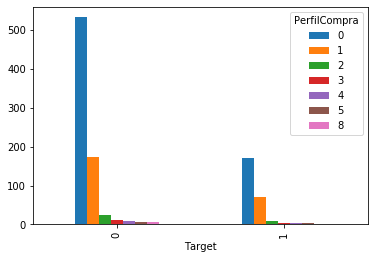

In [64]:
# PerfilCompra
print('------------------------------------------------')
print( 'Cancelados: ',(dados[dados['Target'] == 0]['PerfilCompra'].value_counts()))
print( 'Não Cancelados: ',(dados[dados['Target'] == 1]['PerfilCompra'].value_counts()))
print('------------------------------------------------')
print( 'Proporção cancelados: ',
      (dados[dados['Target'] == 0]['PerfilCompra'].value_counts()
       /dados[dados['Target'] == 0]['PerfilCompra'].count())*100
     )
print('------------------------------------------------')
print('Proporção não cancelados: ',
      (dados[dados['Target'] == 1]['PerfilCompra'].value_counts()
       /dados[dados['Target'] == 1]['PerfilCompra'].count())*100
     )
print('------------------------------------------------')
dados.groupby(['Target','PerfilCompra']).size().unstack().plot(kind='bar',stacked=False)

------------------------------------------------
Cancelados:  Região Nordeste        292
Região Sudeste         199
Região Sul             137
Região Norte            74
Região Centro-Oeste     60
Name: RegiaodoPais, dtype: int64
Não Cancelados:  Região Nordeste        113
Região Sudeste          67
Região Sul              33
Região Norte            27
Região Centro-Oeste     22
Name: RegiaodoPais, dtype: int64
------------------------------------------------
Proporção cancelados:  Região Nordeste       38.320
Região Sudeste        26.115
Região Sul            17.979
Região Norte           9.711
Região Centro-Oeste    7.874
Name: RegiaodoPais, dtype: float64
------------------------------------------------
Proporção não cancelados:  Região Nordeste       43.130
Região Sudeste        25.573
Região Sul            12.595
Região Norte          10.305
Região Centro-Oeste    8.397
Name: RegiaodoPais, dtype: float64
------------------------------------------------


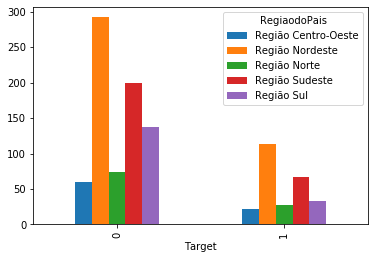

In [65]:
# RegiaodoPais
print('------------------------------------------------')
print( 'Cancelados: ',(dados[dados['Target'] == 0]['RegiaodoPais'].value_counts()))
print( 'Não Cancelados: ',(dados[dados['Target'] == 1]['RegiaodoPais'].value_counts()))
print('------------------------------------------------')
print( 'Proporção cancelados: ',
      (dados[dados['Target'] == 0]['RegiaodoPais'].value_counts()
       /dados[dados['Target'] == 0]['RegiaodoPais'].count())*100
     )
print('------------------------------------------------')
print('Proporção não cancelados: ',
      (dados[dados['Target'] == 1]['RegiaodoPais'].value_counts()
       /dados[dados['Target'] == 1]['RegiaodoPais'].count())*100
     )
print('------------------------------------------------')
dados.groupby(['Target','RegiaodoPais']).size().unstack().plot(kind='bar',stacked=False)

# Criar dummies para var categoricas

In [66]:
base_categoricas = ['PerfilEconomico', 'Sexo', 'PerfilCompra','RegiaodoPais']
dum = pd.get_dummies(dados,
                    columns=base_categoricas,
                    drop_first=True,
                    prefix=base_categoricas,
                     prefix_sep='_'
                    )

In [67]:
dum.head(3)

,Idade,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,MesesDesempregado,Anuidade,Target,PerfilEconomico_2,PerfilEconomico_3,Sexo_mulher,PerfilCompra_1,PerfilCompra_2,PerfilCompra_3,PerfilCompra_4,PerfilCompra_5,PerfilCompra_8,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul
0,24,1875.000,133.929,156.250,MA,Centro Novo do Maranhão,13.021,2,251.194,1,1,0,1,0,1,0,0,0,0,1,0,0,0
1,22,725.000,51.786,60.417,PI,Amarante,5.492,13,233.544,1,0,1,1,0,0,0,0,0,0,1,0,0,0
2,22,72292.000,5163.714,6024.333,MT,Santo Antônio do Leverger,547.667,2,275.437,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [68]:
dum.columns

Index(['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'Target', 'PerfilEconomico_2', 'PerfilEconomico_3', 'Sexo_mulher', 'PerfilCompra_1', 'PerfilCompra_2', 'PerfilCompra_3', 'PerfilCompra_4', 'PerfilCompra_5', 'PerfilCompra_8', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Norte', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul'], dtype='object')

In [69]:
dados_selecionados = dum[['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 
                         'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade',  
                         'PerfilEconomico_2', 'PerfilEconomico_3', 'Sexo_mulher', 
                         'PerfilCompra_1', 'PerfilCompra_2', 'PerfilCompra_3', 
                         'PerfilCompra_4', 'PerfilCompra_5', 'PerfilCompra_8', 'RegiaodoPais_Região Nordeste', 
                         'RegiaodoPais_Região Norte', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul',
                         'Target']]

In [70]:
dados_selecionados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,1024.000,30.271,12.243,10.000,22.000,27.000,35.000,92.000
ValorCompraAnual,1024.000,24785.688,40338.974,0.000,145.000,805.000,40488.500,192583.000
GastoMax,1024.000,1611.283,2757.797,0.000,9.643,57.500,1608.929,13755.929
GastoMedio,1024.000,1879.830,3217.430,0.000,11.250,67.083,1877.083,16048.583
NumeroComprasOnline,1024.000,158.851,280.891,0.000,0.792,6.148,167.211,1375.000
MesesDesempregado,1024.000,5.133,3.485,0.000,2.000,5.000,8.000,14.000
Anuidade,1024.000,83.738,68.936,0.006,34.243,69.119,106.113,309.377
PerfilEconomico_2,1024.000,0.232,0.423,0.000,0.000,0.000,0.000,1.000
PerfilEconomico_3,1024.000,0.574,0.495,0.000,0.000,1.000,1.000,1.000
Sexo_mulher,1024.000,0.344,0.475,0.000,0.000,0.000,1.000,1.000


# Determinar melhores variaveis para todos os modelos

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [72]:
expl = dados_selecionados.drop(columns=['Target'])
target = dados_selecionados.Target

In [73]:
# Normalizar
expl_norm = StandardScaler().fit_transform(expl)

In [74]:
expl_norm

array([[-0.51243863, -0.56823168, -0.5359628 , ..., -0.33079569,
        -0.59238795, -0.44616503],
       [-0.67588269, -0.59675402, -0.56576304, ..., -0.33079569,
        -0.59238795, -0.44616503],
       [-0.67588269,  1.17825323,  1.28877032, ..., -0.33079569,
        -0.59238795, -0.44616503],
       ...,
       [ 0.3865037 , -0.55657472, -0.52378358, ...,  3.02301404,
        -0.59238795, -0.44616503],
       [-0.34899457, -0.61399143, -0.58377275, ..., -0.33079569,
        -0.59238795, -0.44616503],
       [ 0.14133761, -0.59551392, -0.56446738, ..., -0.33079569,
        -0.59238795, -0.44616503]])

### baseado em filtro

In [75]:
chi_selector = SelectKBest(chi2)
chi_selector.fit(expl,target)

SelectKBest(k=10, score_func=<function chi2 at 0x000001B3DE38B948>)

In [76]:
chi_support = chi_selector.get_support()
chi_feature = expl.loc[:,chi_support].columns.tolist()

In [77]:
print(len(chi_feature), ' é número de variaveis selecionadas')
print(chi_feature)

10  é número de variaveis selecionadas
['ValorCompraAnual', 'GastoMax', 'GastoMedio', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'Sexo_mulher', 'PerfilCompra_1', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Sul']


### wraper

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [79]:
rfe_selector = RFE(estimator=LogisticRegression( C=1.0, class_weight=None, dual=False,
                                                 fit_intercept=True, intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto', n_jobs=None, penalty='l2',
                                                 random_state=42, solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                  step=100,           
                  n_features_to_select=10)
rfe_selector.fit(expl,target)
rfe_support = rfe_selector.get_support()
rfe_feature = expl.loc[:,rfe_support].columns.tolist()

In [80]:
print(len(rfe_feature), ' é número de variaveis selecionadas')
print(rfe_feature)

10  é número de variaveis selecionadas
['Idade', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'PerfilEconomico_2', 'PerfilEconomico_3', 'Sexo_mulher', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul']


In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
rfe_selector1 = RFE(estimator=RandomForestClassifier(n_estimators=300),
                  step=100,           
                  n_features_to_select=10)
rfe_selector1.fit(expl,target)
rfe_support1 = rfe_selector1.get_support()
rfe_feature1 = expl.loc[:,rfe_support1].columns.tolist()

In [82]:
print(len(rfe_feature1), ' é número de variaveis selecionadas')
print(rfe_feature1)

10  é número de variaveis selecionadas
['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'Sexo_mulher', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Sudeste']


### Embarcada

In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=300),
                              max_features=10)
rf_selector.fit(expl,target)
rf_support = rf_selector.get_support()
rf_feature = expl.loc[:,rf_support].columns.tolist()

In [85]:
print(len(rf_feature), ' é número de variaveis selecionadas')
print(rf_feature)

3  é número de variaveis selecionadas
['NumeroComprasOnline', 'MesesDesempregado', 'Anuidade']


In [86]:
from sklearn.ensemble import GradientBoostingClassifier
rf_selector1 = SelectFromModel(estimator=GradientBoostingClassifier(random_state=42),
                              max_features=10)
rf_selector1.fit(expl,target)
rf_support1 = rf_selector1.get_support()
rf_feature1 = expl.loc[:,rf_support1].columns.tolist()

In [87]:
print(len(rf_feature1), ' é número de variaveis selecionadas')
print(rf_feature1)

2  é número de variaveis selecionadas
['MesesDesempregado', 'Anuidade']


In [88]:
#comparando 
feature_selection_df = pd.DataFrame({'Variaveis': expl.columns,
                                    'Chi-2':chi_support,
                                    'RFE': rfe_support,
                                     'RFE1':rfe_support1,
                                    'RF':rf_support,
                                    'RF1':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variaveis'],
                                                        ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variaveis,Chi-2,RFE,RFE1,RF,RF1,Total
1,MesesDesempregado,True,True,True,True,True,5
2,Anuidade,True,True,True,True,True,5
3,NumeroComprasOnline,True,True,True,True,False,4
4,Sexo_mulher,True,True,True,False,False,3
5,RegiaodoPais_Região Nordeste,True,True,True,False,False,3
6,ValorCompraAnual,True,False,True,False,False,2
7,RegiaodoPais_Região Sul,True,True,False,False,False,2
8,RegiaodoPais_Região Sudeste,False,True,True,False,False,2
9,Idade,False,True,True,False,False,2
10,GastoMedio,True,False,True,False,False,2


In [89]:
explicativas = dados_selecionados[['MesesDesempregado',
                                  'Anuidade',
                                  'Sexo_mulher',
                                  'RegiaodoPais_Região Nordeste',
                                  'NumeroComprasOnline',
                                  'ValorCompraAnual',
                                  'RegiaodoPais_Região Sul',
                                  'Idade',
                                  'GastoMedio'
                                  ]]

# Treino só com variaveis escolhas

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas,
                                                       target,
                                                       test_size=0.25,
                                                       random_state = 2)

# Regressão Logistica

In [92]:
# dicionario
lr_grid_dc = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,2,3,5]
}

In [93]:
lr = LogisticRegression(random_state=2)

In [94]:
from sklearn.model_selection import GridSearchCV
lr_grid = GridSearchCV(estimator=lr,
                      param_grid=lr_grid_dc,
                       cv=5)

lr_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2, 3, 5], 'tol': [0.0001, 1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
lr_grid.best_params_

{'C': 2, 'tol': 0.0001}

In [96]:
lr_grid.best_score_

0.8241830065359477

In [97]:
from sklearn.externals import joblib
joblib.dump(lr_grid.best_estimator_,'modelo_lr_cancelcartao_gridsearch.pkl',compress=1)
modelo_treinado_lr = open('modelo_lr_cancelcartao_gridsearch.pkl','rb')
model_lr = joblib.load(modelo_treinado_lr)

In [98]:
model_lr

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
model_lr.predict(x_teste)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score
y_gb_teste = model_lr.predict(x_teste)
acc_gb_teste = round(accuracy_score(y_gb_teste,y_teste)*100,2)
print('Teste: ',acc_gb_teste)

Teste:  82.03


# Tree

In [101]:
# dicionario
tree_grid_dc = { 'min_samples_leaf': [1,5,10,15,20],
                'min_samples_split': [1.0,2,3,5,10],
                'max_depth': [1,3,5,8,12],
                'criterion': ['gini','entropy']
}

In [102]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2)

In [103]:
from sklearn.model_selection import GridSearchCV
tree_grid = GridSearchCV(estimator=tree,
                      param_grid=tree_grid_dc,
                       cv=5)

tree_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 8, 12],
            

In [104]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [105]:
tree_grid.best_score_

0.9257703081232492

In [106]:
joblib.dump(tree_grid.best_estimator_,'modelo_tree_cancelcartao_gridsearch.pkl',compress=1)
modelo_treinado_tree = open('modelo_tree_cancelcartao_gridsearch.pkl','rb')
model_tree = joblib.load(modelo_treinado_tree)

In [107]:
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [108]:
model_tree.predict(x_teste)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
y_tree_teste = model_tree.predict(x_teste)
acc_tree_teste = round(accuracy_score(y_tree_teste,y_teste)*100,2)
print('Teste: ',acc_tree_teste)

Teste:  94.92


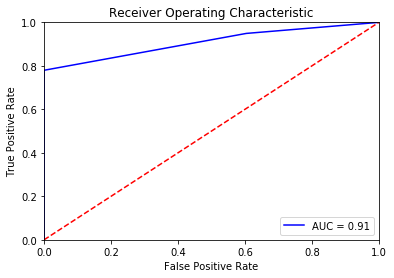

In [110]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_tree.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Random Forest

In [111]:
rf_grid_dc = {
    'n_estimators': [50,100,200,300,400,500,1000],
    'criterion': ['gini','entropy'],
    'bootstrap': [True,False]
}

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)


In [113]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,
                      param_grid=rf_grid_dc,
                       scoring ='accuracy',
                       cv=5)

In [114]:
rf_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [115]:
rf_grid.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 50}

In [116]:
rf_grid.best_score_

0.9231729055258466

In [117]:
joblib.dump(rf_grid.best_estimator_,'modelo_rf_cancelcartao_gridsearch.pkl',compress=1)
modelo_treinado_rf = open('modelo_rf_cancelcartao_gridsearch.pkl','rb')
model_rf = joblib.load(modelo_treinado_rf)

In [118]:
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [119]:
model_rf.predict(x_teste)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
y_rf_teste = model_rf.predict(x_teste)
acc_rf_teste = round(accuracy_score(y_rf_teste,y_teste)*100,2)
print('Teste: ',acc_rf_teste)

Teste:  93.36


# Gradient Boosting

In [654]:
# dicionario
gb_grid_dc = {
    'min_samples_leaf': [1,5,10,15,20],
    'min_samples_split': [1.0,2,3,5,10],
    'max_depth': [1,3,5,8,12],
    'n_estimators': [10,20,30,50,200]
}

In [655]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2)


In [656]:
from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator=gb,
                      param_grid=gb_grid_dc,
                       cv=5)

In [657]:
gb_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [658]:
gb_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 30}

In [659]:
gb_grid.best_score_

0.9283846872082165

In [660]:
joblib.dump(gb_grid.best_estimator_,'modelo_gb_cancelcartao_gridsearch.pkl',compress=1)
modelo_treinado_gb = open('modelo_gb_cancelcartao_gridsearch.pkl','rb')
model_gb = joblib.load(modelo_treinado_gb)

In [661]:
model_gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [662]:
model_gb.predict(x_teste)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [663]:
y_gb_teste = model_gb.predict(x_teste)
acc_gb_teste = round(accuracy_score(y_gb_teste,y_teste)*100,2)
print('Teste: ',acc_gb_teste)

Teste:  93.75


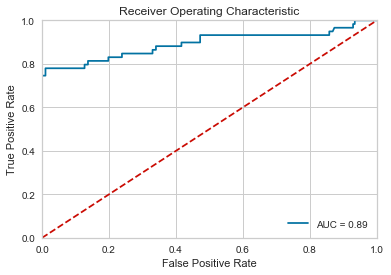

In [748]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_gb.predict_proba(x_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Neural

In [552]:
# dicionario
mlp_grid_dc = {
    'max_iter': [10,100,500],
    'tol': [0.00010,0.000010],
    'solver': ['adam'],
    'hidden_layer_sizes':[(20,20),(50,50),(300)],
    'activation': ['relu']
}

In [553]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose = False,random_state=2)


In [554]:
from sklearn.model_selection import GridSearchCV
mlp_grid = GridSearchCV(estimator=mlp,
                      param_grid=mlp_grid_dc,
                       cv=5)

In [555]:
mlp_grid.fit(x_treino,y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=2, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'a

In [556]:
mlp_grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (50, 50),
 'max_iter': 100,
 'solver': 'adam',
 'tol': 0.0001}

In [557]:
mlp_grid.best_score_

0.7290889665889667

In [558]:
from sklearn.externals import joblib
joblib.dump(mlp_grid.best_estimator_,'modelo_mlp_cancelcartao_gridsearch.pkl',compress=1)
modelo_treinado_mlp = open('modelo_mlp_cancelcartao_gridsearch.pkl','rb')
model_mlp = joblib.load(modelo_treinado_mlp)

In [559]:
model_mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [560]:
model_mlp.predict(x_teste)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [561]:
from sklearn.metrics import accuracy_score
y_mlp_teste = model_mlp.predict(x_teste)
acc_mlp_teste = round(accuracy_score(y_mlp_teste,y_teste)*100,2)
print('Teste: ',acc_mlp_teste)

Teste:  79.87


# Usar AutoML para ver se consegue resultado melhor

In [3]:
from pycaret.classification import *

In [4]:
base_cancel = dados = pd.read_csv('CartaoCredito_cancelamento.csv')
base_st = dados = pd.read_csv('CartaoCredito_semtarget.csv')
# Colocar variavel target nas base
base_cancel['Target'] =  pd.Series(1, index=base_cancel.index)
base_st['Target'] =  pd.Series(0, index=base_st.index)

In [5]:
# Empilhar bases
dados = pd.concat([base_cancel, base_st], axis=0)
print(dados.shape)

(1191, 15)


In [6]:
dados.head(3)

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,180,2,mulher,24,2,1875.000,133.929,156.250,MA,Centro Novo do Maranhão,Região Nordeste,13.021,2,"251,1938708281",1
1,119,3,mulher,22,0,725.000,51.786,60.417,PI,Amarante,Região Nordeste,5.492,13,"233,5439410115",1
2,274,3,homem,22,0,72292.000,5163.714,6024.333,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.667,2,"275,4369442974",1


In [7]:
cols_ignored = ['ID','CidadeResidencia']
num_vars = ['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio','NumeroComprasOnline','MesesDesempregado','Anuidade']
cat_vars = ['PerfilEconomico', 'Sexo', 'PerfilCompra', 'UF','RegiaodoPais']

In [8]:
# Converter anuidade para float
dados.Anuidade = dados.Anuidade.str.replace(',', '.').astype(float)

In [9]:
dados.columns

Index(['ID', 'PerfilEconomico', 'Sexo', 'Idade', 'PerfilCompra', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'RegiaodoPais', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'Target'], dtype='object')

In [10]:
dados_setup = setup(data=dados, target='Target', session_id=42, train_size=0.7,
                      ignore_features=cols_ignored,
                      numeric_features=num_vars,
                      numeric_imputation='median',
                      categorical_features=cat_vars,
                      categorical_imputation='constant')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1191, 15)"
4,Missing Values,True
5,Numeric Features,8
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
dados_setup[0]

,Idade,ValorCompraAnual,GastoMedio,NumeroComprasOnline,MesesDesempregado,Anuidade,PerfilEconomico_1,PerfilEconomico_2,PerfilEconomico_3,Sexo_homem,...,UF_RS,UF_SC,UF_SE,UF_SP,UF_TO,RegiaodoPais_Região Centro-Oeste,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul
0,24.000,1875.000,156.250,13.021,2.000,251.194,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,22.000,725.000,60.417,5.492,13.000,233.544,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,22.000,72292.000,6024.333,547.667,2.000,275.437,0.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
3,22.000,155.000,12.917,1.174,13.000,2.003,0.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,15.000,26.000,2.167,0.289,7.000,249.335,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000,13.000,1.083,0.080,4.000,39.625,0.000,1.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
887,19.000,30.000,2.500,0.263,1.000,69.138,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
888,35.000,2345.000,195.417,11.167,6.000,11.445,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
889,26.000,30.000,2.500,0.192,7.000,1.466,1.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000


In [12]:
[type(x) for x in dados_setup]

[pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series,
 int,
 sklearn.pipeline.Pipeline,
 list]

In [14]:
compare_models(blacklist = [ 'lightgbm' ])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9388,0.8745,0.7667,0.9879,0.8617,0.8234
1,CatBoost Classifier,0.9376,0.882,0.7667,0.9823,0.8594,0.8203
2,Gradient Boosting Classifier,0.9339,0.8677,0.7667,0.9674,0.8529,0.8112
3,Random Forest Classifier,0.9255,0.8492,0.7619,0.9329,0.837,0.7895
4,Ada Boost Classifier,0.9244,0.8617,0.7524,0.9372,0.8327,0.7848
5,Decision Tree Classifier,0.8883,0.8559,0.7905,0.7877,0.7832,0.7085
6,Ridge Classifier,0.8787,0,0.5476,0.9542,0.6921,0.6241
7,Linear Discriminant Analysis,0.8739,0.8445,0.5667,0.8998,0.6915,0.6179
8,Extra Trees Classifier,0.8511,0.843,0.5667,0.7871,0.656,0.5646
9,Logistic Regression,0.8092,0.717,0.4619,0.6392,0.5281,0.4221


In [649]:
xgboost_model = create_model(estimator='xgboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.952,0.911,0.809,1.000,0.895,0.864
1,0.952,0.896,0.809,1.000,0.895,0.864
2,0.946,0.876,0.786,1.000,0.880,0.846
3,0.922,0.870,0.738,0.939,0.827,0.777
4,0.922,0.836,0.691,1.000,0.817,0.769
Mean,0.939,0.878,0.767,0.988,0.863,0.824
SD,0.014,0.025,0.046,0.024,0.034,0.042


In [650]:
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [651]:
tuned_xgboost_model = tune_model(estimator='xgboost', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.952,0.929,0.857,0.947,0.900,0.869
1,0.941,0.887,0.762,1.000,0.865,0.828
2,0.929,0.873,0.714,1.000,0.833,0.789
3,0.940,0.941,0.857,0.900,0.878,0.838
4,0.928,0.883,0.809,0.895,0.850,0.802
5,0.916,0.806,0.667,1.000,0.800,0.749
6,0.892,0.866,0.667,0.875,0.757,0.689
7,0.928,0.879,0.762,0.941,0.842,0.796
8,0.928,0.874,0.714,1.000,0.833,0.789
9,0.916,0.764,0.667,1.000,0.800,0.749


In [750]:
tuned_xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=60,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

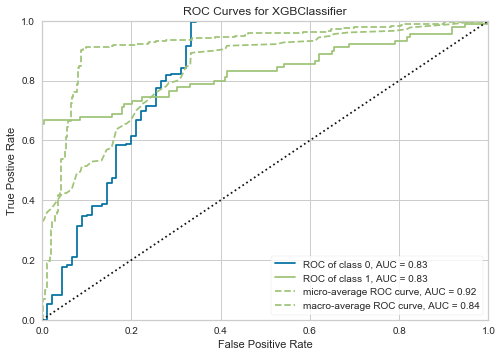

In [652]:
plot_model(tuned_xgboost_model)

# Conclusão
<ul>
<li>Feito análise inicial com seleção de variáveis e grid search e algorítimo com melhor resultado foi
    Tree com accuracy média na base de treino 0.926 e de 94.92 na base de testes e com AUC = 0.91 </li>
<li>Depois feita análise com AutoML(PYCARET) e selecionado o Extreme Gradient Boosting e depois de tuned
    chegou a uma accuracy média de 0.927 e max de 95.2 um AUC médio de 0.87 e max de 0.929 </li>
</ul>

Como as performances foram similares, poderiamos aplicar qualaquer um dos dois modelos.